In [18]:
#==========================================
Script for plotting Epsilometer data
READ ep_test.jl 
to study the sensors noise
the board and sensor are on a granit and in the dark 
==========================================#

using PyPlot
include("local_library.jl")

varnames=["T1","T2","Shear1","Shear2", "Cond1", "Accelx","Accely","Accelz"]


8-element Array{ASCIIString,1}:
 "T1"    
 "T2"    
 "Shear1"
 "Shear2"
 "Cond1" 
 "Accelx"
 "Accely"
 "Accelz"

In [19]:
fid = open("ep_test_test_flip.txt")
nblinesavailable = countlines(fid) # countlines changes the position of the file!!!
seekstart(fid)
fLines = readlines(fid) #grab the chunk size or more?

dataBuffer = zeros(UInt32, nblinesavailable, length(varnames));
for (linenum,line) in enumerate(fLines) #over each line
  lineData = split(line[1:end-1],',')
  for(ch, val) in enumerate(lineData)
      dataBuffer[linenum, ch] = parse(UInt32,val,16)
  end
end


In [20]:
Az     = dataBuffer[:,end];

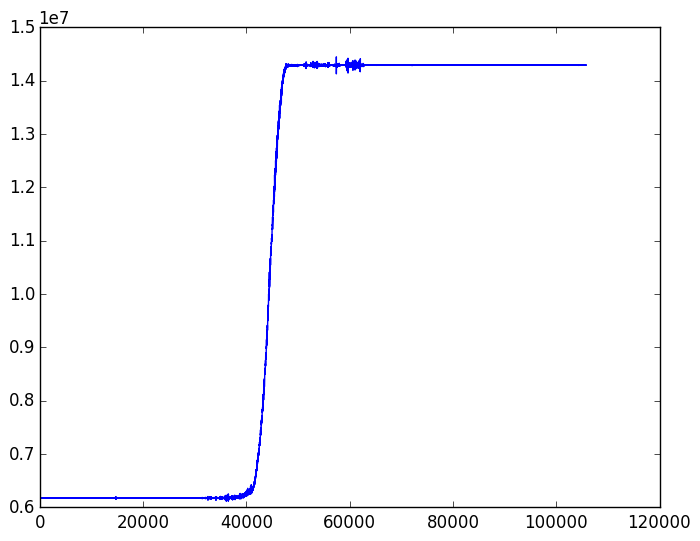

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x324cabf98>

In [21]:
plot(Az)

In [22]:
m1=mean(Az[10000:25000])

6.177355267515499e6

In [23]:
m2=mean(Az[70000:100000])

1.4293203139395354e7

In [24]:
v1=Count2Volt_accel(m1)

0.9204976659291236

In [25]:
v2=Count2Volt_accel(m2)

2.1298532395653953

In [26]:
v2-2.31

-0.18014676043460476

In [27]:
v1-.99

-0.06950233407087636

In [28]:
Twog_count=m2-m1

8.115847871879855e6

In [29]:
g_count=Twog_count/2

4.0579239359399276e6

In [30]:
Twog_volt=v2-v1

1.2093555736362718

In [31]:
g_volt=Twog_volt/2

0.6046777868181359

In [32]:
offset_count=g_count+m1

1.0235279203455426e7

In [33]:
offset_volt=g_volt+v1

1.5251754527472596